<a href="https://colab.research.google.com/github/honggilgim/python_test_with_colab/blob/main/K_means_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install watermark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
%load_ext watermark
%watermark -u -d -v -p numpy,pandas,matplotlib,scipy,sklearn

Last updated: 2022-06-04

Python implementation: CPython
Python version       : 3.7.13
IPython version      : 5.5.0

numpy     : 1.21.6
pandas    : 1.3.5
matplotlib: 3.2.2
scipy     : 1.4.1
sklearn   : 0.0



In [5]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, 
                  n_features=2, 
                  centers=5, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

In [6]:
#k-means clustering

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
def distance(a, b):
    return sum((a - b) ** 2)/len(a)

In [8]:
def group_center(g):
    g = np.array(g)
    return g.mean(axis=0)

In [35]:
def cluster(x, k, seed=101, iter_num=25):
    logs = []
    np.random.seed(seed)
    centers = x[np.random.choice(len(x), size=k, replace=False)]
    answer = []
    for it in range(iter_num):
        group = {}
        for i in range(k):
            group[i] = []
        # find nearest center
        for row in x:
            temp = []
            for i in range(k):
                temp.append(distance(centers[i], row))
            group[np.argmin(temp)].append(row.tolist())

        # plot data store
        for i in range(k):
            group_temp = np.array(group[i])
            group_temp = np.c_[group_temp, np.full(len(group_temp), i)]
            if i == 0:
                grouped = group_temp
            else:
                grouped = np.append(grouped, group_temp, axis = 0)

        # update center
        centers_new = []
        for i in range(k):
            centers_new.append(group_center(group[i]).tolist())
        centers_new = np.array(centers_new)
        # if updated center == center, break

        if np.sum(centers - centers_new) == 0:
            answer=centers
            break
        else:
            centers = centers_new
            logs.append(grouped)
    return grouped, logs, it, answer 

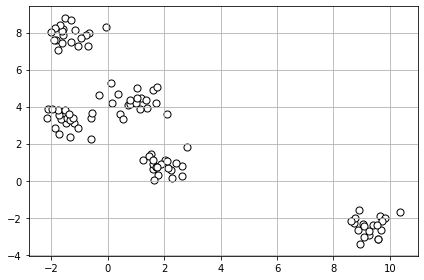

In [11]:
plt.scatter(X[:, 0], X[:, 1], 
            c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
plt.show()

In [214]:
# K = 3일 경우
grouped, logs, it, answer = cluster(X, 3)
print(f'iter num:{it}')

iter num:4


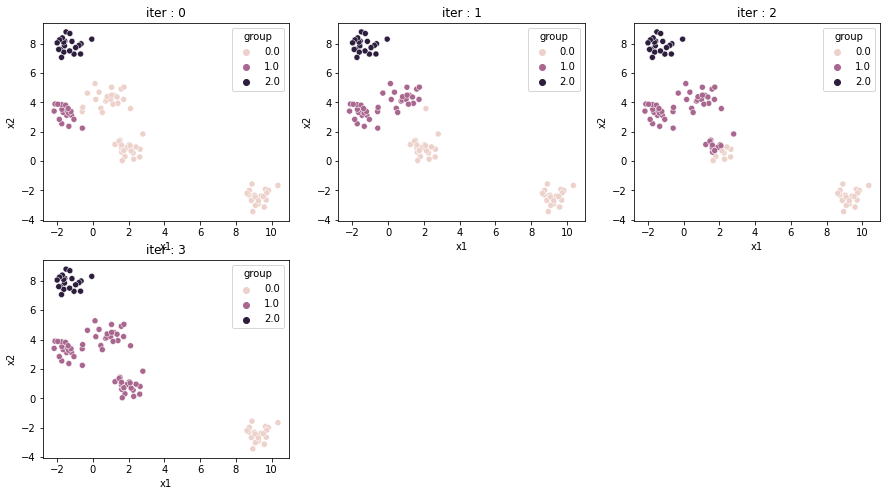

In [215]:
plt.figure(figsize=(15,8))
for i in range(it):
    plt.subplot(2, it//2+1, i+1)  # row, col, index
    df = pd.DataFrame(logs[i])
    df.columns = ['x1', 'x2', 'group']
    sns.scatterplot(data = df, x = 'x1', y = 'x2', hue = 'group').set_title(f'iter : {i}')

Text(0.5, 1.0, 'iter : 3')

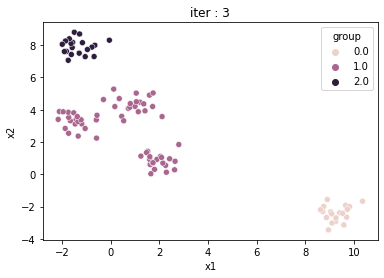

In [216]:
df = pd.DataFrame(logs[3])
df.columns = ['x1', 'x2', 'group']
sns.scatterplot(data = df, x = 'x1', y = 'x2', hue = 'group').set_title(f'iter : {i}')

In [217]:
an = pd.DataFrame(answer)

In [218]:
an.columns = ['x1','x2']
arrs = ['centroids','centroids','centroids']
an['group']= arrs

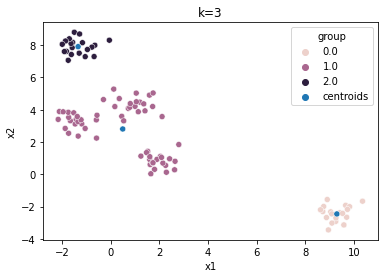

In [222]:
# K=3일 경우 그래프
df = pd.DataFrame(logs[3])
df.columns = ['x1', 'x2', 'group']
sns.scatterplot(data = df, x = 'x1', y = 'x2', hue = 'group').set_title(f'k=3')
sns.scatterplot(data = an, x = 'x1', y = 'x2', hue = 'group')

In [223]:
# silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score
score_sil = silhouette_samples(df, df['group'])
score_sil

array([0.88042945, 0.91585881, 0.93060273, 0.91581339, 0.88849767,
       0.905295  , 0.91450548, 0.93379196, 0.92517553, 0.92524334,
       0.9391924 , 0.91561332, 0.92211331, 0.93719397, 0.86697959,
       0.92977148, 0.90553735, 0.93739457, 0.93807917, 0.91625569,
       0.53440773, 0.48376678, 0.43673987, 0.43224351, 0.32644739,
       0.56113646, 0.58876615, 0.07141961, 0.50075278, 0.51214687,
       0.56720339, 0.49067311, 0.58985644, 0.34941111, 0.45584258,
       0.59355194, 0.53320341, 0.6103095 , 0.39604988, 0.63983476,
       0.4838928 , 0.48729458, 0.59351071, 0.58981097, 0.64971865,
       0.52116738, 0.28094062, 0.65206786, 0.45284391, 0.33049765,
       0.64235447, 0.33162469, 0.44448366, 0.44896935, 0.65267364,
       0.5152001 , 0.36869018, 0.42580254, 0.26190048, 0.48151005,
       0.47034243, 0.54151272, 0.27330006, 0.29182011, 0.52948358,
       0.29093703, 0.54342742, 0.63700846, 0.64727138, 0.61946049,
       0.45313126, 0.65010671, 0.64063518, 0.48133226, 0.60991

In [224]:
arrs = np.array([])

In [225]:
# K = 3 일 경우 
score_sil.mean()

0.6491418265053125

In [264]:
arrs = np.append(arr,score_sil.mean())

In [228]:
# K = 4일 경우
grouped, logs, it, answer = cluster(X, 4)
print(f'iter num:{it}')

iter num:4


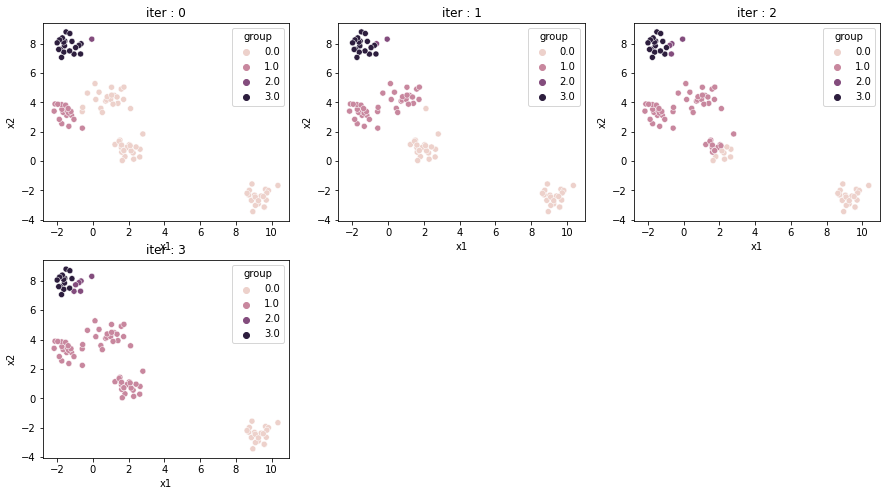

In [229]:
plt.figure(figsize=(15,8))
for i in range(it):
    plt.subplot(2, it//2+1, i+1)  # row, col, index
    df = pd.DataFrame(logs[i])
    df.columns = ['x1', 'x2', 'group']
    sns.scatterplot(data = df, x = 'x1', y = 'x2', hue = 'group').set_title(f'iter : {i}')

In [230]:
an = pd.DataFrame(answer)
an.columns = ['x1','x2']
arrs = ['centroids','centroids','centroids','centroids']
an['group']= arrs

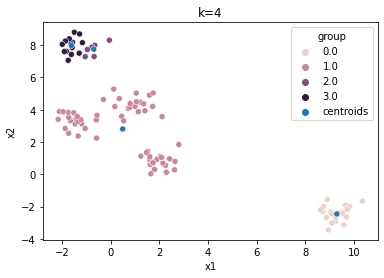

In [231]:
# K=4일 경우 그래프
df = pd.DataFrame(logs[3])
df.columns = ['x1', 'x2', 'group']
sns.scatterplot(data = df, x = 'x1', y = 'x2', hue = 'group').set_title(f'k=4')
sns.scatterplot(data = an, x = 'x1', y = 'x2', hue = 'group')

In [232]:
# silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score
score_sil = silhouette_samples(df, df['group'])
score_sil

array([ 0.88042945,  0.91585881,  0.93060273,  0.91581339,  0.88849767,
        0.905295  ,  0.91450548,  0.93379196,  0.92517553,  0.92524334,
        0.9391924 ,  0.91561332,  0.92211331,  0.93719397,  0.86697959,
        0.92977148,  0.90553735,  0.93739457,  0.93807917,  0.91625569,
        0.52303211,  0.47149843,  0.42644708,  0.36302544,  0.23186583,
        0.52513075,  0.56028262, -0.05675298,  0.45000364,  0.49677417,
        0.56720339,  0.43718718,  0.55834619,  0.34746543,  0.44176533,
        0.57769297,  0.50929581,  0.60312483,  0.38634757,  0.61926483,
        0.42703444,  0.47904558,  0.59351071,  0.58981097,  0.6316015 ,
        0.47088441,  0.21548509,  0.63213695,  0.38773433,  0.32043922,
        0.6229366 ,  0.25317395,  0.3812696 ,  0.39779194,  0.63321732,
        0.5152001 ,  0.35386181,  0.35604075,  0.26103798,  0.46717127,
        0.40952626,  0.54151272,  0.16727537,  0.1890941 ,  0.48318972,
        0.28600923,  0.52818217,  0.61907662,  0.62880777,  0.60

In [233]:
# K = 4 일 경우 
score_sil.mean()

0.5717291057852941

In [265]:
arrs = np.append(arr,score_sil.mean())

In [236]:
# K = 5일 경우
grouped, logs, it, answer = cluster(X, 5)
print(f'iter num:{it}')

iter num:8


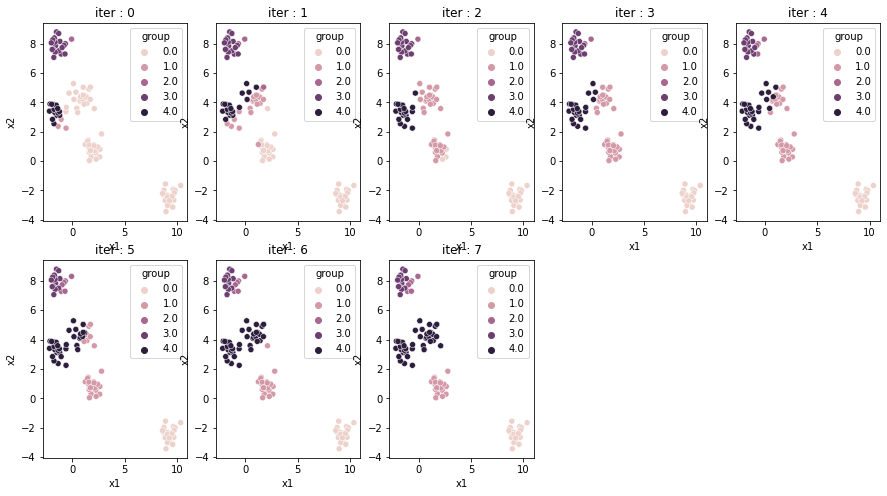

In [237]:
plt.figure(figsize=(15,8))
for i in range(it):
    plt.subplot(2, it//2+1, i+1)  # row, col, index
    df = pd.DataFrame(logs[i])
    df.columns = ['x1', 'x2', 'group']
    sns.scatterplot(data = df, x = 'x1', y = 'x2', hue = 'group').set_title(f'iter : {i}')

In [238]:
an = pd.DataFrame(answer)
an.columns = ['x1','x2']
arrs = ['centroids','centroids','centroids','centroids','centroids']
an['group']= arrs

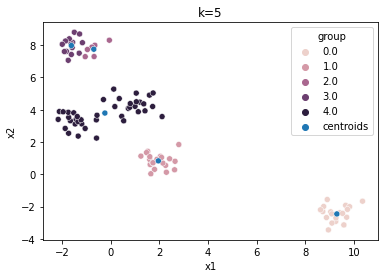

In [239]:
# K=5일 경우 그래프
df = pd.DataFrame(logs[7])
df.columns = ['x1', 'x2', 'group']
sns.scatterplot(data = df, x = 'x1', y = 'x2', hue = 'group').set_title(f'k=5')
sns.scatterplot(data = an, x = 'x1', y = 'x2', hue = 'group')

In [240]:
# silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score
score_sil = silhouette_samples(df, df['group'])
score_sil

array([0.84520306, 0.89039705, 0.91125737, 0.89347736, 0.85666662,
       0.87671188, 0.89230142, 0.9146585 , 0.90548479, 0.90322437,
       0.92248811, 0.89316604, 0.90000738, 0.91917333, 0.83496275,
       0.91122526, 0.87652226, 0.92047605, 0.92077295, 0.89395582,
       0.70125728, 0.83248264, 0.85361266, 0.86846129, 0.86927119,
       0.81185507, 0.79564269, 0.79936861, 0.88363344, 0.80700038,
       0.81829991, 0.83053397, 0.86590812, 0.86598163, 0.88093088,
       0.85504564, 0.87984245, 0.85359611, 0.88105413, 0.87307849,
       0.48111147, 0.46595324, 0.62828934, 0.64818974, 0.58144185,
       0.59623187, 0.63527333, 0.43163755, 0.62471317, 0.60090103,
       0.45331337, 0.39441524, 0.50574508, 0.59226417, 0.41802069,
       0.65413923, 0.61044885, 0.37439185, 0.63689899, 0.63263102,
       0.55617833, 0.65350594, 0.62839509, 0.56372145, 0.44578503,
       0.64277208, 0.38322451, 0.64040214, 0.67145633, 0.63193218,
       0.59941525, 0.54647078, 0.65228853, 0.50738379, 0.68471

In [241]:
# K = 5일 경우 silhouette score
score_sil.mean()

0.6875285227786901

In [266]:
arrs = np.append(arr,score_sil.mean())

In [242]:
# K = 6일 경우
grouped, logs, it, answer = cluster(X, 6)
print(f'iter num:{it}')

iter num:6


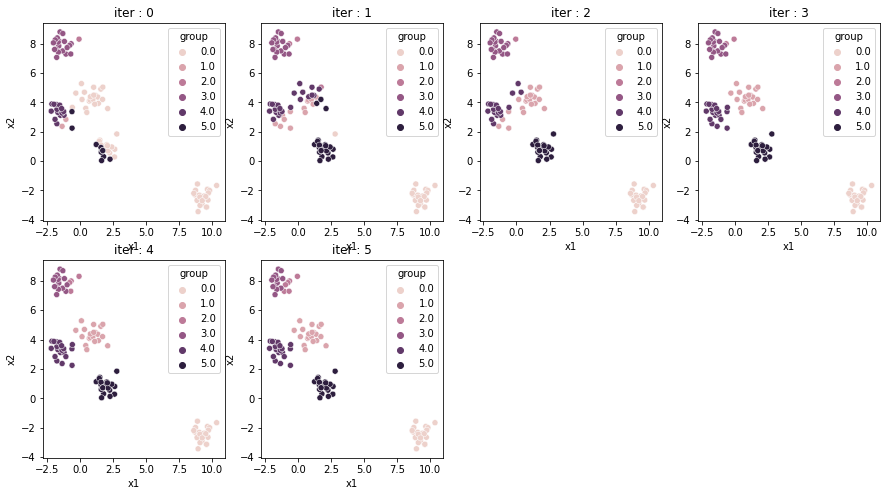

In [243]:
plt.figure(figsize=(15,8))
for i in range(it):
    plt.subplot(2, it//2+1, i+1)  # row, col, index
    df = pd.DataFrame(logs[i])
    df.columns = ['x1', 'x2', 'group']
    sns.scatterplot(data = df, x = 'x1', y = 'x2', hue = 'group').set_title(f'iter : {i}')

In [245]:
an = pd.DataFrame(answer)
an.columns = ['x1','x2']
arrs = ['centroids','centroids','centroids','centroids','centroids','centroids']
an['group']= arrs

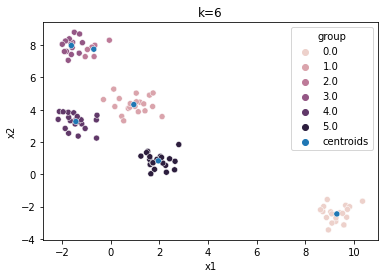

In [246]:
# K=6일 경우 그래프
df = pd.DataFrame(logs[5])
df.columns = ['x1', 'x2', 'group']
sns.scatterplot(data = df, x = 'x1', y = 'x2', hue = 'group').set_title(f'k=6')
sns.scatterplot(data = an, x = 'x1', y = 'x2', hue = 'group')

In [247]:
# silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score
score_sil = silhouette_samples(df, df['group'])
score_sil

array([0.87083026, 0.90814311, 0.92365883, 0.90843128, 0.87671721,
       0.89706059, 0.90690178, 0.9276634 , 0.91835872, 0.91798699,
       0.93349632, 0.90699482, 0.91422833, 0.93126769, 0.85572659,
       0.92296256, 0.89705278, 0.9314991 , 0.93203657, 0.90770812,
       0.80656022, 0.7106819 , 0.68776023, 0.48235631, 0.79521856,
       0.80656028, 0.64220757, 0.82036998, 0.78284627, 0.55819631,
       0.80350223, 0.70358832, 0.80705033, 0.70319223, 0.80713231,
       0.7662072 , 0.70019086, 0.66699318, 0.66966717, 0.78821702,
       0.48111147, 0.46595324, 0.62828934, 0.64818974, 0.58144185,
       0.59623187, 0.63527333, 0.43163755, 0.62471317, 0.60090103,
       0.45331337, 0.39441524, 0.50574508, 0.59226417, 0.41802069,
       0.65413923, 0.61044885, 0.37439185, 0.63689899, 0.63263102,
       0.71182214, 0.84487295, 0.84645781, 0.82759364, 0.79154076,
       0.84791264, 0.52715232, 0.70805416, 0.83505034, 0.76251489,
       0.79805574, 0.80449782, 0.75425363, 0.84700605, 0.77917

In [248]:
# K = 6일 경우 silhouette score
score_sil.mean()
arrs=np.append(arrs,score_sil.mean())

In [249]:
# K = 7일 경우
grouped, logs, it, answer = cluster(X, 7)
print(f'iter num:{it}')

iter num:4


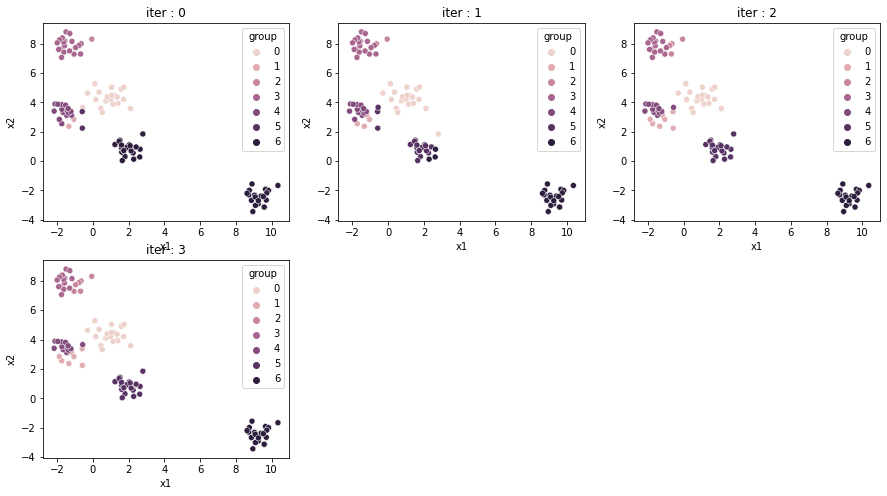

In [250]:
plt.figure(figsize=(15,8))
for i in range(it):
    plt.subplot(2, it//2+1, i+1)  # row, col, index
    df = pd.DataFrame(logs[i])
    df.columns = ['x1', 'x2', 'group']
    sns.scatterplot(data = df, x = 'x1', y = 'x2', hue = 'group').set_title(f'iter : {i}')

In [251]:
an = pd.DataFrame(answer)
an.columns = ['x1','x2']
arrs = ['centroids','centroids','centroids','centroids','centroids','centroids','centroids']
an['group']= arrs

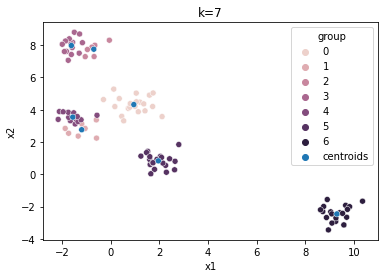

In [252]:
# K=7일 경우 그래프
df = pd.DataFrame(logs[3])
df.columns = ['x1', 'x2', 'group']
sns.scatterplot(data = df, x = 'x1', y = 'x2', hue = 'group').set_title(f'k=7')
sns.scatterplot(data = an, x = 'x1', y = 'x2', hue = 'group')

In [253]:
# silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score
score_sil = silhouette_samples(df, df['group'])
score_sil

array([0.75673723, 0.70010787, 0.47470656, 0.52107557, 0.69471601,
       0.71677767, 0.38604921, 0.74604048, 0.69936842, 0.37527355,
       0.74796844, 0.62642667, 0.73446045, 0.53038392, 0.75530309,
       0.69779344, 0.69659503, 0.6722628 , 0.56648243, 0.69449624,
       0.76863219, 0.73483537, 0.62880583, 0.49819636, 0.74519998,
       0.76465137, 0.71196027, 0.48111147, 0.46595324, 0.62828934,
       0.64818974, 0.58144185, 0.59623187, 0.63527333, 0.43163755,
       0.62471317, 0.60090103, 0.45331337, 0.39441524, 0.50574508,
       0.59226417, 0.41802069, 0.65413923, 0.61044885, 0.37439185,
       0.63689899, 0.63263102, 0.80427966, 0.84209604, 0.77022758,
       0.85220379, 0.85378535, 0.83219454, 0.83768318, 0.77587043,
       0.82824771, 0.8058479 , 0.81946616, 0.6557274 , 0.84894005,
       0.69563277, 0.82645299, 0.8398593 , 0.85760659, 0.86119197,
       0.79285066, 0.75998351, 0.77016897, 0.87269728, 0.7780591 ,
       0.81139   , 0.8207703 , 0.85044974, 0.84935857, 0.87248

In [255]:
# K = 7일 경우 silhouette score
score_sil.mean()

0.735602479573604

In [267]:
arrs = np.append(arr,score_sil.mean())

In [256]:
# K = 8일 경우
grouped, logs, it, answer = cluster(X, 8)
print(f'iter num:{it}')

iter num:6


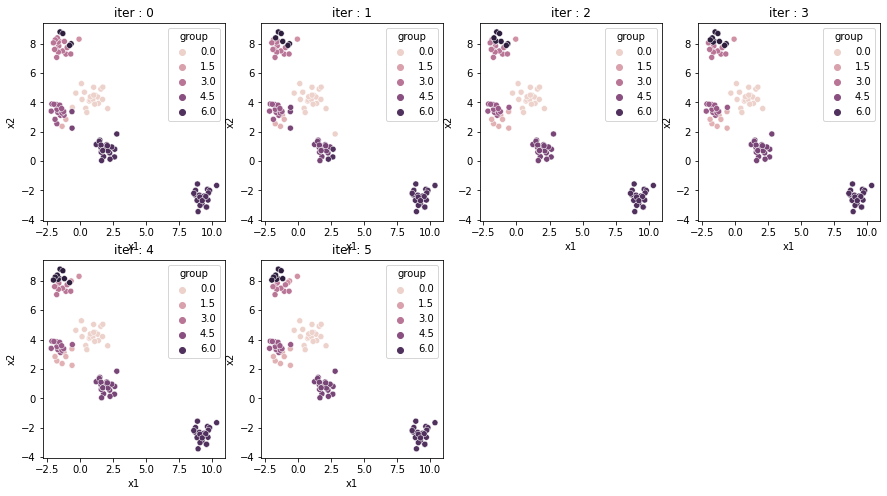

In [257]:
plt.figure(figsize=(15,8))
for i in range(it):
    plt.subplot(2, it//2+1, i+1)  # row, col, index
    df = pd.DataFrame(logs[i])
    df.columns = ['x1', 'x2', 'group']
    sns.scatterplot(data = df, x = 'x1', y = 'x2', hue = 'group').set_title(f'iter : {i}')

In [258]:
an = pd.DataFrame(answer)
an.columns = ['x1','x2']
arrs = ['centroids','centroids','centroids','centroids','centroids','centroids','centroids','centroids']
an['group']= arrs

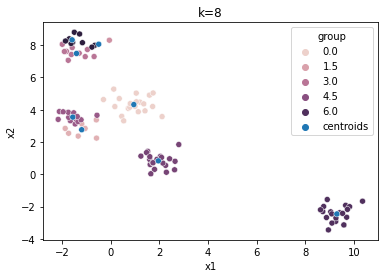

In [259]:
# K=8일 경우 그래프
df = pd.DataFrame(logs[3])
df.columns = ['x1', 'x2', 'group']
sns.scatterplot(data = df, x = 'x1', y = 'x2', hue = 'group').set_title(f'k=8')
sns.scatterplot(data = an, x = 'x1', y = 'x2', hue = 'group')

In [260]:
# silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score
score_sil = silhouette_samples(df, df['group'])
score_sil

array([0.75673723, 0.70010787, 0.47470656, 0.52107557, 0.69471601,
       0.71677767, 0.38604921, 0.74604048, 0.69936842, 0.37527355,
       0.74796844, 0.62642667, 0.73446045, 0.53038392, 0.75530309,
       0.69779344, 0.69659503, 0.6722628 , 0.56648243, 0.69449624,
       0.76863219, 0.73483537, 0.62880583, 0.49819636, 0.74519998,
       0.76465137, 0.71196027, 0.        , 0.68411834, 0.73283429,
       0.60350528, 0.6988039 , 0.74295811, 0.71956171, 0.38755127,
       0.49347714, 0.67438191, 0.60287461, 0.80427966, 0.84209604,
       0.77022758, 0.85220379, 0.85378535, 0.83219454, 0.83768318,
       0.77587043, 0.82824771, 0.8058479 , 0.81946616, 0.6557274 ,
       0.84894005, 0.69563277, 0.82645299, 0.8398593 , 0.85760659,
       0.86119197, 0.79285066, 0.75998351, 0.77016897, 0.87269728,
       0.7780591 , 0.81139   , 0.8207703 , 0.85044974, 0.84935857,
       0.87248236, 0.836631  , 0.86686862, 0.84614236, 0.86842995,
       0.86320224, 0.84520306, 0.89039705, 0.91125737, 0.89347

In [262]:
# K = 8일 경우 silhouette score
score_sil.mean()

0.7649778035430641

In [268]:
arrs = np.append(arr,score_sil.mean())

In [272]:
answer = np.argmax(arrs) + 3
print("최대값 : ", answer)

최대값 :  8


3 : 0.64

4 : 0.57

5 : 0.68

6 : 0.75

7 : 0.73

8 : 0.76

의 silhouette score를 가지기에, 가장 적합한 k는 8이다.